In [1]:
import uproot
import pandas as pd
import numpy as np
import glob


In [2]:
import matplotlib.pyplot as plt
plt.style.use('default')
plt.style.use('belle2')

import os

In [5]:
import glob

base_path = "/share/storage/jykim/storage_b2/storage/reduced_ntuples/MC15rd/etapip_eteeta/MC15rd_etaetapip_loose_v3_241129"

# base_path = "/share/storage/jykim/storage_b2/storage/reduced_ntuples/MC15rd/etapip_eteeta/MC15rd_etaetapip_loose_v6_241211"

cm_elements = ["15rd_eta_e7_18_4S_v3", "15rd_eta_e20_b26_v1", "15rd_eta_e20_e26_4S_v2", "15rd_eta_e21_5S_scan_v1", "15rd_eta_mori_off_v1"]

file_list = []
for element in cm_elements:
    pattern = f"{base_path}/{element}/*.root"
    file_list += glob.glob(pattern)


dataframes = []
branches_all = ["__experiment__", "__run__", "__event__",\
             'Dp_M','Dp_isSignal','Dp_CMS_p','Dp_cosAngleBetweenMomentumAndVertexVector','Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane',\
             'Dp_acos_cosAngleBetweenMomentumAndVertexVector','Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane',\
             'etapip_Eta_M','etapip_Eta_isSignal','etapip_Eta_daughterDiffOfPhi_0_1','etapip_Eta_daughterAngle_0_1','etapip_Eta_Easym','etapip_Eta_p',\
             'etapip_Eta_genMotherPDG','etapip_Eta_genMotherID','etapip_gamma1_p','etapip_gamma2_p','etapip_gamma1_clusterNHits','etapip_gamma2_clusterNHits',\
             'etapip_gamma1_clusterReg', 'etapip_gamma2_clusterReg',\
             'Pip_pionID','Pip_pionIDNN','Pip_mcPDG','Pip_dr','Pip_dr','Pip_p',\
             'Pip_genMotherPDG','Pip_genMotherID',\
             'ROE_Mgg','dM_pi0','ROE_Mgg_50MeV','dM_pi0_50MeV','ROE_Mgg_75MeV','dM_pi0_75MeV','ROE_Mgg_mask','dM_pi0_mask',\
             'ROE_Mgg_2','dM_pi0_2','ROE_Mgg_50MeV_2','dM_pi0_50MeV_2','ROE_Mgg_75MeV_2','dM_pi0_75MeV_2','ROE_Mgg_mask_2','dM_pi0_mask_2',\
             'veto_isSignal','veto_isSignal_50MeV','veto_isSignal_75MeV','veto_isSignal_mask',\
             'num_Dstar','num_Dstar_no_nan','CFT_qr','CFT_prob']
# Process each file
for file_name in file_list:
    # Load the ROOT file and tree
    file = uproot.open(file_name)
    tree = file["etapip_pipipi_K"]

    # Specify the branches you want to extract
    branches = ['etapip_pi0_gamma1_beamBackgroundSuppression','etapip_pi0_gamma2_beamBackgroundSuppression','Pip_pionIDNN','Pip_pionID','Dp_Psum','Pip_genMotherID','etapip_Eta_genMotherID','Pip_genMotherPDG','etapip_Eta_genMotherPDG','Dp_cosHelicityAngleMomentum','Pip_dr',"Dp_isSignal","Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane", "Pip_p","Dp_CMS_p","etapip_Eta_p","CFT_prob","Dp_M","num_Dstar_no_nan",]  # Replace with actual branch names

    # Convert the selected branches to a Pandas DataFrame
    df_temp = tree.arrays(branches, library="pd")
    # df_temp = tree.arrays(library="pd")

    # Append the DataFrame to the list
    dataframes.append(df_temp)

# Concatenate all DataFrames into a single DataFrame
df_bkg = pd.concat(dataframes, ignore_index=True)

df_bkg = df_bkg.query('Dp_isSignal!=1')
df_bkg = df_bkg.query('(Pip_genMotherID!=etapip_Eta_genMotherID) | abs(Pip_genMotherPDG)!=431 | abs(etapip_Eta_genMotherPDG)!=431')

KeyInFileError: not found: 'etapip_pi0_gamma1_beamBackgroundSuppression'
in file /share/storage/jykim/storage_b2/storage/reduced_ntuples/MC15rd/etapip_eteeta/MC15rd_etaetapip_loose_v3_241129/15rd_eta_e7_18_4S_v3/ccbar.root
in object /etapip_pipipi_K;9

In [510]:
# df_bkg = df_bkg.query('num_Dstar_no_nan>0')
# df_bkg = df_bkg.query('Pip_pionID<0.01')
# df_bkg = df_bkg.query('Pip_pionIDNN<0.01')

df_bkg = df_bkg.query('Pip_p>0.3')

# df_bkg = df_bkg.query('Dp_M> 1.7 & Dp_M<2.1')
df_bkg = df_bkg.query('Dp_M> 1.8 & Dp_M<2.05')

In [511]:
# df_bkg['3pi_psum'] = df_bkg.query('Pip_pionID<0.01')

In [512]:
df_bkg.describe()

,Pip_pionIDNN,Pip_pionID,Dp_Psum,Pip_genMotherID,etapip_Eta_genMotherID,Pip_genMotherPDG,etapip_Eta_genMotherPDG,Dp_cosHelicityAngleMomentum,Pip_dr,Dp_isSignal,Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane,Pip_p,Dp_CMS_p,etapip_Eta_p,CFT_prob,Dp_M,num_Dstar_no_nan
count,1.119700e+06,1.119700e+06,1.119700e+06,1.119700e+06,1.119700e+06,1.119700e+06,1.119700e+06,1.119700e+06,1.119700e+06,929015.0,1.119700e+06,1.119700e+06,1.119700e+06,1.119700e+06,1.119700e+06,1.119700e+06,1.119700e+06
mean,1.047480e-01,5.669409e-02,3.633669e+00,6.597818e+00,1.791669e+00,1.068131e+03,2.663975e+03,1.478707e-02,4.726406e-03,0.0,1.253753e-01,1.835957e+00,3.065091e+00,1.797712e+00,5.048758e-01,1.914620e+00,-9.548165e-01
std,1.351926e-01,1.625179e-01,6.669648e-01,7.420525e+00,3.771542e+00,9.662520e+04,9.471643e+04,6.582215e-01,1.660737e-02,0.0,9.466755e-01,1.085521e+00,4.923661e-01,1.035488e+00,3.082024e-01,7.198355e-02,3.065394e-01
min,0.000000e+00,0.000000e+00,2.184499e+00,0.000000e+00,0.000000e+00,-1.003230e+05,-9.000211e+06,-9.999224e-01,1.106647e-08,0.0,-1.000000e+00,3.000001e-01,2.500000e+00,4.000000e-01,4.976392e-04,1.800000e+00,-1.000000e+00
25%,5.469184e-05,1.007072e-13,3.146135e+00,2.000000e+00,0.000000e+00,2.300000e+01,0.000000e+00,-6.559954e-01,9.082791e-04,0.0,-9.943801e-01,8.179290e-01,2.678277e+00,8.284198e-01,2.209735e-01,1.851389e+00,-1.000000e+00
50%,1.883360e-02,1.031278e-06,3.578449e+00,2.000000e+00,0.000000e+00,2.300000e+01,0.000000e+00,4.733969e-02,2.025257e-03,0.0,8.927713e-01,1.810499e+00,2.927246e+00,1.714178e+00,5.034358e-01,1.909282e+00,-1.000000e+00
75%,2.123896e-01,6.070895e-03,4.014511e+00,9.000000e+00,2.000000e+00,1.130000e+02,2.300000e+01,6.828555e-01,4.176319e-03,0.0,9.989949e-01,2.697708e+00,3.325442e+00,2.594900e+00,7.896413e-01,1.975194e+00,-1.000000e+00
max,3.999999e-01,1.000000e+00,2.470336e+01,9.500000e+01,5.400000e+01,9.010221e+06,9.010443e+06,9.998233e-01,9.980557e-01,0.0,1.000000e+00,2.225999e+01,1.890723e+01,7.574181e+00,9.994998e-01,2.050000e+00,5.000000e+00


In [513]:
nan_columns = df_bkg.isnull().any()
print(nan_columns)

Pip_pionIDNN                                          False
Pip_pionID                                            False
Dp_Psum                                               False
Pip_genMotherID                                       False
etapip_Eta_genMotherID                                False
Pip_genMotherPDG                                      False
etapip_Eta_genMotherPDG                               False
Dp_cosHelicityAngleMomentum                           False
Pip_dr                                                False
Dp_isSignal                                            True
Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane    False
Pip_p                                                 False
Dp_CMS_p                                              False
etapip_Eta_p                                          False
CFT_prob                                              False
Dp_M                                                  False
num_Dstar_no_nan                        

In [514]:
base_path_sig = "/share/storage/jykim/storage_ghi/Ntuples_ghi_2/MC15rd_sigMC"
elements_sig = ["DptoetaKp_pipipi", "DptoetaKp_pipipi_cc"]
project_name = "241129_loose_v3"
project_name = "241211_loose_v5"
project_name = "241211_loose_v6"

file_list_sig = []
for element in elements_sig:
    pattern = f"{base_path_sig}/{element}/{project_name}/*.root"
    file_list_sig += glob.glob(pattern)
# print(file_list_sig)



In [515]:
dataframes_signal = []
for file_name in file_list_sig:
    # Load the ROOT file and tree
    file = uproot.open(file_name)
    tree = file["etapip_pipipi_K"]

    # Specify the branches you want to extract
    # branches = ['Dp_Psum','Pip_genMotherID','etapip_Eta_genMotherID','Pip_genMotherPDG','etapip_Eta_genMotherPDG','Dp_cosHelicityAngleMomentum',"Pip_dr","Dp_isSignal","Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane", "Pip_p","Dp_CMS_p","etapip_Eta_p","CFT_prob","Dp_M","num_Dstar_no_nan",]  # Replace with actual branch names
    branches = ['Pip_pionIDNN','Pip_pionID','Dp_Psum','Pip_genMotherID','etapip_Eta_genMotherID','Pip_genMotherPDG','etapip_Eta_genMotherPDG','Dp_cosHelicityAngleMomentum',"Pip_dr","Dp_isSignal","Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane", "Pip_p","Dp_CMS_p","etapip_Eta_p","CFT_prob","Dp_M","num_Dstar_no_nan",]  # Replace with actual branch names

    # Convert the selected branches to a Pandas DataFrame
    df_temp = tree.arrays(branches, library="pd")
    # df_temp = tree.arrays(library="pd")

    # Append the DataFrame to the list
    dataframes_signal.append(df_temp)


df_signal = pd.concat(dataframes_signal, ignore_index=True)
df_signal = df_signal.query('Dp_isSignal==1')

In [516]:
# df_signal = df_signal.query('num_Dstar_no_nan>0')
# df_signal = df_signal.query('Pip_pionID<0.01')
# df_signal = df_signal.query('Pip_pionIDNN<0.01')
df_signal = df_signal.query('Pip_p>0.3')



In [517]:
df_signal.describe()

,Pip_pionIDNN,Pip_pionID,Dp_Psum,Pip_genMotherID,etapip_Eta_genMotherID,Pip_genMotherPDG,etapip_Eta_genMotherPDG,Dp_cosHelicityAngleMomentum,Pip_dr,Dp_isSignal,Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane,Pip_p,Dp_CMS_p,etapip_Eta_p,CFT_prob,Dp_M,num_Dstar_no_nan
count,638838.000000,6.388380e+05,638838.000000,638838.000000,638838.000000,638838.000000,638838.000000,638838.000000,6.388380e+05,638838.0,638838.000000,638838.000000,638838.000000,638838.000000,638838.000000,638838.000000,638838.000000
mean,0.065162,3.193571e-02,3.935164,9.428412,9.428412,1.461704,1.461704,-0.180009,2.105426e-02,1.0,0.929425,1.668055,3.393468,2.267110,0.502650,1.868430,-0.685933
std,0.107040,1.196649e-01,0.729504,5.433304,5.433304,410.997722,410.997722,0.489118,2.682792e-02,0.0,0.350295,0.888685,0.568763,0.875211,0.318391,0.012143,0.745107
min,0.000000,0.000000e+00,2.224724,3.000000,3.000000,-411.000000,-411.000000,-0.999753,1.651070e-07,1.0,-1.000000,0.300003,2.500001,0.400108,0.000494,1.501848,-1.000000
25%,0.000271,1.111892e-12,3.399446,6.000000,6.000000,-411.000000,-411.000000,-0.603432,4.336593e-03,1.0,0.999599,0.939819,2.917579,1.622372,0.200369,1.864899,-1.000000
50%,0.008028,2.851061e-07,3.860558,8.000000,8.000000,411.000000,411.000000,-0.225319,1.183287e-02,1.0,0.999964,1.555999,3.332837,2.223163,0.500000,1.868879,-1.000000
75%,0.077067,6.302722e-04,4.406472,12.000000,12.000000,411.000000,411.000000,0.207670,2.743363e-02,1.0,0.999997,2.256399,3.813749,2.848950,0.804839,1.872681,-1.000000
max,0.399999,1.000000e+00,7.206543,59.000000,59.000000,411.000000,411.000000,0.999722,9.483227e-01,1.0,1.000000,5.708853,5.293072,6.026983,0.998913,2.098397,7.000000


In [518]:
nan_columns = df_signal.isnull().any()
print(nan_columns)

Pip_pionIDNN                                          False
Pip_pionID                                            False
Dp_Psum                                               False
Pip_genMotherID                                       False
etapip_Eta_genMotherID                                False
Pip_genMotherPDG                                      False
etapip_Eta_genMotherPDG                               False
Dp_cosHelicityAngleMomentum                           False
Pip_dr                                                False
Dp_isSignal                                           False
Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane    False
Pip_p                                                 False
Dp_CMS_p                                              False
etapip_Eta_p                                          False
CFT_prob                                              False
Dp_M                                                  False
num_Dstar_no_nan                        

In [519]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Ensure the signal and background datasets are balanced
min_size = min(len(df_signal), len(df_bkg))

# Sample an equal number of rows from both signal and background
df_signal_balanced = df_signal.sample(n=min_size, random_state=42)
df_bkg_balanced = df_bkg.sample(n=min_size, random_state=42)

# Assign labels: signal=1, background=0
df_signal_balanced['label'] = 1
df_bkg_balanced['label'] = 0

# Concatenate the signal and background datasets
df_combined = pd.concat([df_signal_balanced, df_bkg_balanced], ignore_index=True)

# Shuffle the combined dataset
df_combined = df_combined.sample(frac=1, random_state=42).reset_index(drop=True)

# Drop the specified columns
columns_to_drop = ['Pip_pionIDNN','Dp_M','Pip_pionID','Pip_genMotherID','etapip_Eta_genMotherID','Pip_genMotherPDG','etapip_Eta_genMotherPDG','Dp_isSignal','Dp_CMS_p','CFT_prob', 'Dp_M', 'Pip_p', 'etapip_Eta_p', 'num_Dstar_no_nan'] 
                   # 'etapip_Eta_daughterDiffOfPhi_0_1', 'etapip_Eta_daughterAngle_0_1']
df_combined = df_combined.drop(columns=columns_to_drop)


In [520]:
df_combined.describe()

,Dp_Psum,Dp_cosHelicityAngleMomentum,Pip_dr,Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane,label
count,1.277676e+06,1.277676e+06,1.277676e+06,1.277676e+06,1277676.0
mean,3.784215e+00,-8.277807e-02,1.290187e-02,5.272617e-01,0.5
std,7.154458e-01,5.879672e-01,2.391139e-02,8.192524e-01,0.5
min,2.184499e+00,-9.997534e-01,1.106647e-08,-1.000000e+00,0.0
25%,3.263099e+00,-6.276819e-01,1.532301e-03,6.068292e-01,0.0
50%,3.710329e+00,-1.497231e-01,4.238133e-03,9.994210e-01,0.5
75%,4.216452e+00,4.641674e-01,1.412290e-02,9.999829e-01,1.0
max,2.470336e+01,9.997221e-01,9.980557e-01,1.000000e+00,1.0


In [521]:
plt.rcParams['font.family'] = 'DejaVu Sans'


In [436]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import os
# # plt.rcParams['text.usetex'] = True

# # # Rename the features
# feature_names = {
#     'Pip_dr': r'$dr(\pi^+)$',
#     'Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane': r'$\cos \theta_{XY}$',
#     'Dp_Psum': r'$p(\eta)+p(\pi^+)$',
#     'Dp_cosHelicityAngleMomentum': r'cosHel$(D^+)$'
# }

# # # Apply the renaming
# df_combined.rename(columns=feature_names, inplace=True)

# # Compute the correlation matrix
# corr_matrix = df_combined.drop(columns=['label']).corr()

# plt.rcParams['font.family'] = 'DejaVu Sans'

# # Plot the correlation matrix with larger annotation text
# plt.figure(figsize=(10, 8))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, 
#             vmin=-1, vmax=1,  # Set the limits of the colormap
#             xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns, 
#             annot_kws={"size": 14})  # Increase the size of the correlation numbers

# # Set the title and label sizes
# plt.title('Correlation Matrix of Features', fontsize=18)  # Title size
# plt.xticks(fontsize=14)  # X-axis label size
# plt.yticks(fontsize=14)  # Y-axis label size

# # # Ensure the path is expanded correctly
# # save_path = os.path.expanduser('~/PLOTS/DNN/belle2_etapip_gg_correlation_240919_coshel_momentum.png')

# # plt.tight_layout()
# # # Save the figure
# # plt.savefig(save_path)
# plt.savefig("MC15rd_etapip_pipipi_K_corr_loose_v2_again.png")

# plt.show()


In [522]:
from sklearn.model_selection import train_test_split

# Separate features and labels
X = df_combined.drop(columns='label')
y = df_combined['label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [523]:
# import joblib
# model_file = "best_xgb_model_etapip_pipipi.pkl"
# best_xgb_model = joblib.load(model_file)

In [524]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Load your dataset
# df = pd.read_csv('your_dataset.csv')

# Separate features and target
X = X_train
y = y_train

# Define the XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# #Define the parameter grid for XGBoost
# param_grid = {
#     'n_estimators': [50, 100, 150],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0]
# }
# param_grid = {
#     'n_estimators': [100, 300, 500, 700, 900, 1100],
#     'max_depth': [5, 7, 9, 11],
#     'learning_rate': [0.005, 0.01, 0.1, 0.2],
#     'subsample': [0.8,0.9, 1.0],
#     'colsample_bytree': [0.8,0.9, 1.0]
# }
# param_grid = {
#     'n_estimators': [100, 500, 700, 1100],
#     'max_depth': [5, 7, 9, 11],
#     'learning_rate': [0.005, 0.01, 0.1, 0.2],
#     # 'subsample': [0.8,0.9, 1.0],
#     # 'colsample_bytree': [0.8,0.9, 1.0]
# }
# # Initialize GridSearchCV with cross-validation
# grid_search = GridSearchCV(
#     estimator=xgb_model,
#     param_grid=param_grid,
#     scoring='accuracy',
#     cv=5,  # 5-fold cross-validation
#     verbose=1,
#     n_jobs=12
#     # n_jobs=28
# )

# # Perform the grid search
# grid_search.fit(X, y)



# # Get the best model and its parameters
# best_xgb_model = grid_search.best_estimator_
# print("Best Parameters:", grid_search.best_params_)
# print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Save the best model if needed
# import joblib
# joblib.dump(best_xgb_model, 'MC15rd_best_xgb_model_etapip_pipipi_K_loose_v5.pkl')


xgb_model.fit(X,y)
best_xgb_model = xgb_model


/home/jykim/anaconda3/envs/draw/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


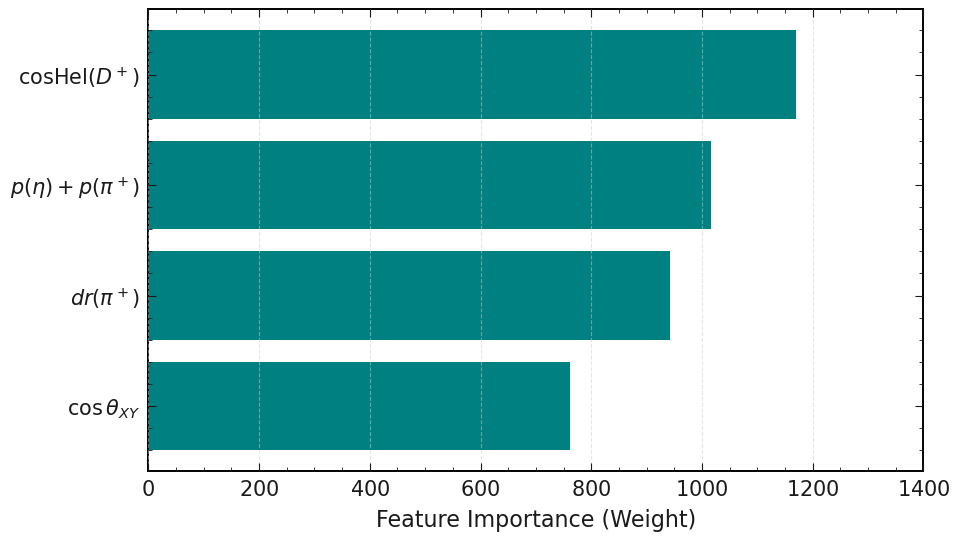

In [525]:
# Extract the underlying Booster object from the trained XGBClassifier
booster = best_xgb_model.get_booster()

# Get the feature importances with 'weight'
importance_dict = booster.get_score(importance_type='weight')

# The rest of the code remains the same
import pandas as pd

# Rename the features for display
feature_names = {
    'Pip_dr': r'$dr(\pi^+)$',
    'Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane': r'$\cos \theta_{XY}$',
    'Dp_Psum': r'$p(\eta)+p(\pi^+)$',
    'Dp_cosHelicityAngleMomentum': r'cosHel$(D^+)$'
}

# Convert to a DataFrame for easier manipulation
importance_df = pd.DataFrame.from_dict(importance_dict, orient='index', columns=['Weight'])
importance_df.index = [feature_names.get(f, f) for f in importance_df.index]  # Rename using LaTeX labels
importance_df = importance_df.sort_values(by='Weight', ascending=False)

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(importance_df.index, importance_df['Weight'], color='teal')
plt.xlabel('Feature Importance (Weight)', fontsize=16)
# plt.title('Feature Importances with Customized Labels', fontsize=14)
plt.gca().invert_yaxis()  # Show the most important feature on top
plt.grid(axis='x', linestyle='--', alpha=0.5)

# plt.savefig("MC15rd_etapip_pipipi_K_importance_loose_v5_Pip_p_03_pidnn01.png")

# Show plot
plt.show()

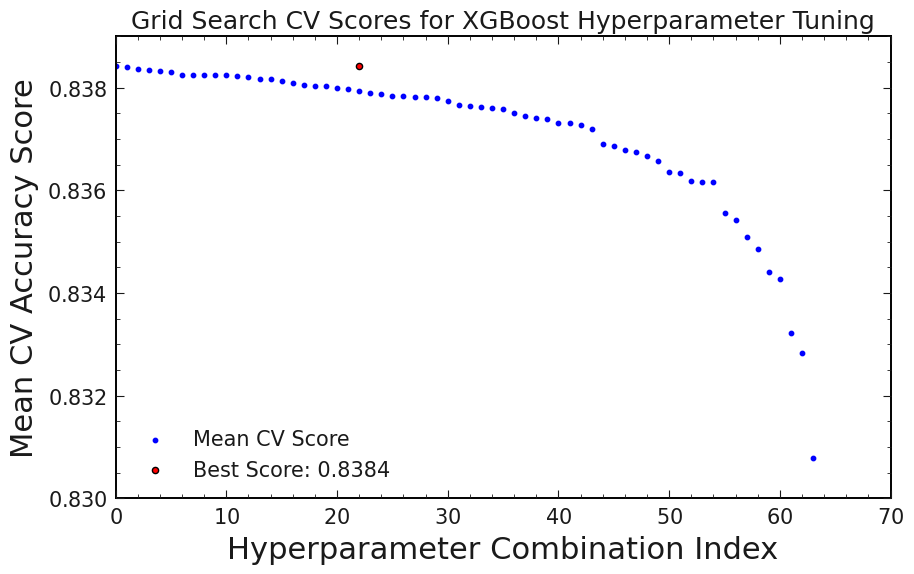

In [167]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract all mean cross-validation scores and parameter combinations
results_df = pd.DataFrame(grid_search.cv_results_)
# results_df = pd.DataFrame(random_search.cv_results_)


# Sort results by mean test score in descending order
results_df = results_df.sort_values(by='mean_test_score', ascending=False)

# Highlight the best score
best_score = grid_search.best_score_
# best_score = random_search.best_score_

# Plotting the scores using Matplotlib
plt.figure(figsize=(10, 6))

# Create a scatter plot
plt.scatter(
    range(len(results_df)),
    results_df['mean_test_score'],
    c='blue',  # Color for the points
    s=10,
    marker='o',
    label='Mean CV Score'
)

# Highlighting the best score
best_index = results_df['mean_test_score'].idxmax()
plt.scatter(best_index, best_score, color='red', s=20, label=f'Best Score: {best_score:.4f}', edgecolor='black')

# Adding labels and legend
plt.title("Grid Search CV Scores for XGBoost Hyperparameter Tuning")
plt.xlabel("Hyperparameter Combination Index")
plt.ylabel("Mean CV Accuracy Score")
plt.legend(loc="lower left")
plt.xlim(0,)
# Save the figure
plt.savefig("MC15rd_etapip_pipipi_K_gridsearch_loose_v5.png")

# Show the plot
plt.show()


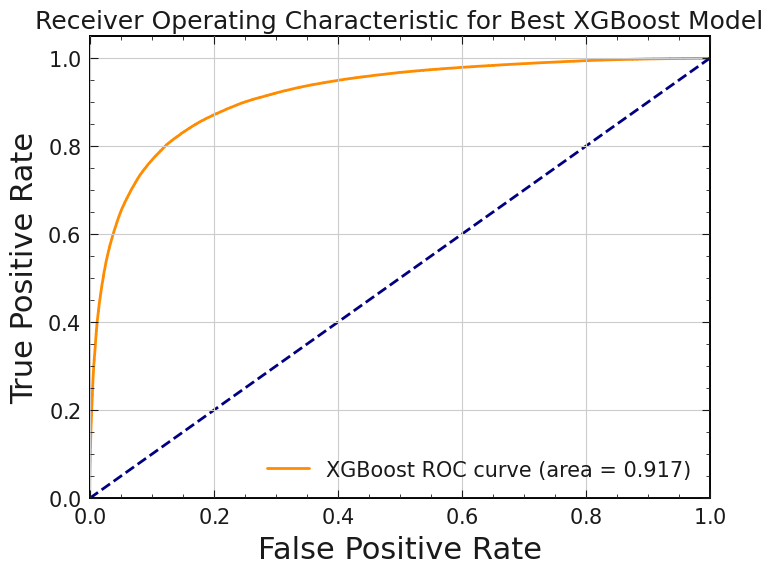

In [526]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_prob_xgb = best_xgb_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'XGBoost ROC curve (area = {roc_auc_xgb:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Best XGBoost Model')
plt.legend(loc='lower right')
plt.grid(True)

# Uncomment the following lines to save the plot
# save_path = '~/PLOTS/XGBoost/240919_ROC_xgb.png'
# save_path_full = os.path.expanduser(save_path)
# plt.savefig(save_path_full)
# plt.savefig("MC15rd_etapip_pipipi_K_roc_loose_v5_Pip_p_03_pidnn01.png")

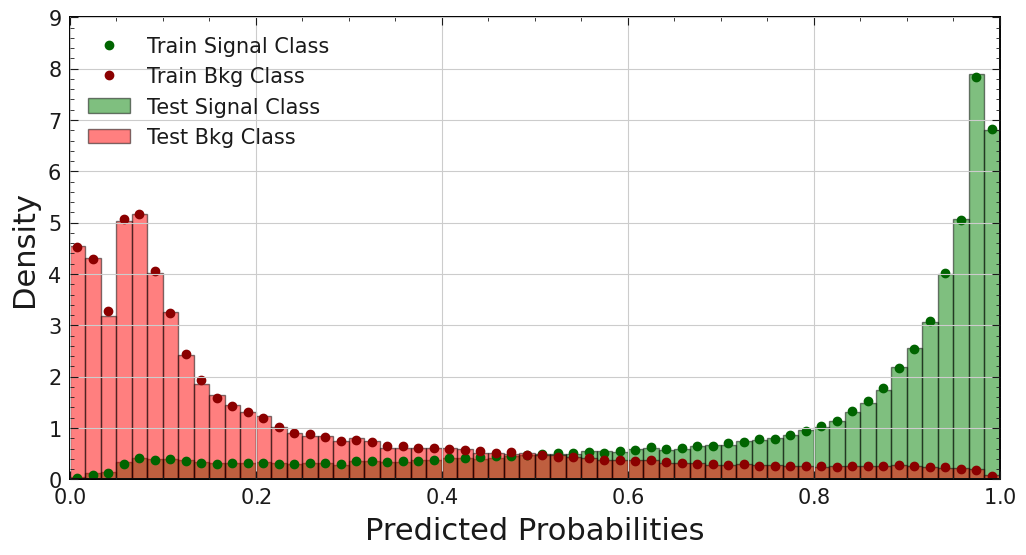

In [527]:
# Get predicted probabilities
y_train_probs = best_xgb_model.predict_proba(X_train)[:, 1]
y_test_probs = best_xgb_model.predict_proba(X_test)[:, 1]

import matplotlib.pyplot as plt
import numpy as np

# Function to plot histograms for train (as points) and test (as bars)
def plot_probability_histograms(y_train_true, y_train_probs, y_test_true, y_test_probs):
    plt.figure(figsize=(12, 6))
    
    # Define a common set of bins for both train and test
    bins = np.linspace(0, 1, 61)  # 60 bins from 0 to 1 for predicted probabilities

    # Test set: Plot histograms as bars
    plt.hist(y_test_probs[y_test_true == 1], bins=bins, alpha=0.5, label='Test Signal Class', color='green', edgecolor='black', density=True)
    plt.hist(y_test_probs[y_test_true == 0], bins=bins, alpha=0.5, label='Test Bkg Class', color='red', edgecolor='black', density=True)

    # Train set: Calculate histogram values for points
    hist_train_pos, _ = np.histogram(y_train_probs[y_train_true == 1], bins=bins, density=True)
    hist_train_neg, _ = np.histogram(y_train_probs[y_train_true == 0], bins=bins, density=True)

    # Calculate the bin centers (to place the points in the middle of each bin)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])

    # Plot the train set histograms as points
    plt.plot(bin_centers, hist_train_pos, 'o', label='Train Signal Class', color='darkgreen')
    plt.plot(bin_centers, hist_train_neg, 'o', label='Train Bkg Class', color='darkred')

    # Labels, title, and legend
    plt.xlabel('Predicted Probabilities')
    plt.ylabel('Density')
    plt.legend(loc='best')
    plt.grid(True)
    plt.xlim(0,1)

# Calculate predicted probabilities for the training and test sets
y_train_probs = best_xgb_model.predict_proba(X_train)[:, 1]
y_test_probs = best_xgb_model.predict_proba(X_test)[:, 1]

# Plot histograms with train set as points and test set as bars
plot_probability_histograms(
    y_train, y_train_probs,
    y_test, y_test_probs
)

# save_path = '~/PLOTS/HBDT/240919_outputs_momentum_sum.png'
# save_path_full = os.path.expanduser(save_path)

# plt.savefig(save_path_full)
# plt.savefig("MC15rd_train_test_etapip_pipipi_K_loose_v5_Pip_p_03_pidnn01.png")
plt.show()

In [528]:
base_path = "/share/storage/jykim/storage_b2/storage/reduced_ntuples/MC15rd/etapip_eteeta/MC15rd_etaetapip_loose_v3_241129"

base_path = "/share/storage/jykim/storage_b2/storage/reduced_ntuples/MC15rd/etapip_eteeta/MC15rd_etaetapip_loose_v6_241211"

cm_elements = ["15rd_eta_e7_18_4S_v3", "15rd_eta_e20_b26_v1", "15rd_eta_e20_e26_4S_v2", "15rd_eta_e21_5S_scan_v1", "15rd_eta_mori_off_v1"]

file_list = []
for element in cm_elements:
    pattern = f"{base_path}/{element}/*.root"
    file_list += glob.glob(pattern)


dataframes = []

# Process each file
for file_name in file_list:
    # Load the ROOT file and tree
    file = uproot.open(file_name)
    tree = file["etapip_pipipi_K"]

    # Specify the branches you want to extract
    branches = ['Pip_pionIDNN','Pip_pionID','Dp_Psum','Pip_genMotherID','etapip_Eta_genMotherID','Pip_genMotherPDG','etapip_Eta_genMotherPDG','Dp_cosHelicityAngleMomentum','Pip_dr',"Dp_isSignal","Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane", "Pip_p","Dp_CMS_p","etapip_Eta_p","CFT_prob","Dp_M","num_Dstar_no_nan",]  # Replace with actual branch names

    # Convert the selected branches to a Pandas DataFrame
    df_temp = tree.arrays(branches, library="pd")
    # df_temp = tree.arrays(library="pd")

    # Append the DataFrame to the list
    dataframes.append(df_temp)

# Concatenate all DataFrames into a single DataFrame
df_bkg_apply = pd.concat(dataframes, ignore_index=True)


In [529]:
# df_bkg_apply = df_bkg_apply.query('Pip_pionID<0.01')
# df_bkg_apply = df_bkg_apply.query('Pip_pionIDNN<0.01')
df_bkg_apply = df_bkg_apply.query('Pip_p>0.3')

In [530]:
# Separate signal and background data
df_isSignal_true = df_bkg_apply.query('Dp_isSignal==1')
df_isSignal_false = df_bkg_apply.query('Dp_isSignal!=1')


In [531]:
# df_isSignal_true = df_bkg_apply.query('(Pip_genMotherID == etapip_Eta_genMotherID) & abs(Pip_genMotherPDG)==431 ')
# df_isSignal_false = df_bkg_apply.query('(Pip_genMotherID != etapip_Eta_genMotherID) |  abs(Pip_genMotherPDG)!=431')


In [532]:
df_isSignal_false

,Pip_pionIDNN,Pip_pionID,Dp_Psum,Pip_genMotherID,etapip_Eta_genMotherID,Pip_genMotherPDG,etapip_Eta_genMotherPDG,Dp_cosHelicityAngleMomentum,Pip_dr,Dp_isSignal,Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane,Pip_p,Dp_CMS_p,etapip_Eta_p,CFT_prob,Dp_M,num_Dstar_no_nan
0,3.778866e-01,3.088184e-02,3.111228,2.0,0.0,23.0,0.0,-0.312466,0.004298,NaN,-0.999394,1.163764,2.815611,1.947465,0.602003,1.755323,-1.0
1,7.789159e-02,1.919144e-03,5.296708,26.0,2.0,323.0,23.0,0.959522,0.000441,0.0,-0.999998,4.509146,4.168820,0.787562,0.722253,1.530798,-1.0
2,2.747505e-36,4.662581e-24,3.080705,5.0,12.0,-313.0,-421.0,-0.771452,0.002245,0.0,-0.972846,0.588544,3.295171,2.492161,0.759277,2.033190,-1.0
3,2.747505e-36,4.662581e-24,2.731825,5.0,6.0,-313.0,-413.0,-0.727180,0.002245,0.0,-0.973285,0.588544,2.964250,2.143281,0.748373,1.893708,-1.0
4,7.952403e-07,9.999948e-01,4.764046,12.0,0.0,421.0,0.0,-0.917234,0.009061,0.0,0.999616,0.548049,3.756289,4.215997,0.040277,1.722442,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3870652,2.129528e-01,1.431104e-01,3.247251,2.0,0.0,23.0,0.0,0.718127,0.001026,0.0,-0.997413,2.541187,2.718887,0.706063,0.706691,2.038534,-1.0
3870653,2.424379e-02,8.605190e-05,2.329720,5.0,0.0,223.0,0.0,-0.782180,0.003583,NaN,0.999471,0.451252,2.584934,1.878469,0.731926,1.697827,-1.0
3870654,2.424379e-02,8.605190e-05,2.434772,5.0,0.0,223.0,0.0,-0.795368,0.003583,NaN,0.998265,0.451254,2.699266,1.983517,0.753309,1.731625,-1.0
3870655,1.657888e-01,5.025777e-02,3.261587,2.0,0.0,23.0,0.0,0.768972,0.000392,0.0,0.999997,2.559489,2.899068,0.702098,0.537578,1.568796,-1.0


In [533]:
# Drop the specified columns, but keep 'Dp_M' for reference
columns_to_drop = ['Pip_pionIDNN','Pip_pionID','Dp_CMS_p','CFT_prob','etapip_Eta_p','Pip_p','num_Dstar_no_nan','Dp_M','Pip_genMotherID', 'etapip_Eta_genMotherID', 'Pip_genMotherPDG', 'Dp_isSignal', 'etapip_Eta_genMotherPDG']
df_isSignal_true_dropped = df_isSignal_true.drop(columns=columns_to_drop)
df_isSignal_false_dropped = df_isSignal_false.drop(columns=columns_to_drop)


In [534]:
df_isSignal_true_dropped

,Dp_Psum,Dp_cosHelicityAngleMomentum,Pip_dr,Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane
782,4.888762,-0.375851,0.111640,0.999998
1179,3.750505,-0.448339,0.029802,1.000000
1460,4.597023,0.075892,0.034770,0.999994
1545,3.644482,-0.060508,0.021049,0.999997
2983,5.062702,0.720633,0.006974,0.999933
...,...,...,...,...
3676695,3.975186,-0.119662,0.003608,0.999437
3677292,3.697708,0.005818,0.006027,0.997547
3678863,3.353073,0.488441,0.021907,0.999859
3679872,4.674212,-0.243685,0.002611,0.999585


In [535]:
# Reorder the columns of df_isSignal_true_dropped and df_isSignal_false_dropped to match the training data's feature order
df_isSignal_true_dropped = df_isSignal_true_dropped[best_xgb_model.get_booster().feature_names]
df_isSignal_false_dropped = df_isSignal_false_dropped[best_xgb_model.get_booster().feature_names]

# Now try to predict probabilities
isSignal_true_probabilities = best_xgb_model.predict_proba(df_isSignal_true_dropped)
df_isSignal_true_dropped['prob_signal'] = isSignal_true_probabilities[:, 1]

isSignal_false_probabilities = best_xgb_model.predict_proba(df_isSignal_false_dropped)
df_isSignal_false_dropped['prob_signal'] = isSignal_false_probabilities[:, 1]


In [536]:
# Optionally, you can combine the datasets back with 'Dp_M' if needed
df_isSignal_true_combined = pd.merge(df_isSignal_true, df_isSignal_true_dropped[['prob_signal']], left_index=True, right_index=True)
df_isSignal_false_combined = pd.merge(df_isSignal_false, df_isSignal_false_dropped[['prob_signal']], left_index=True, right_index=True)


In [537]:
# Prepare the data
df_combined_all_range = pd.concat([df_isSignal_true_combined, df_isSignal_false_combined], ignore_index=True)

df_combined_all_range['Dp_isSignal'] = df_combined_all_range['Dp_isSignal'].fillna(0)

In [538]:
# df_combined_all_range = df_combined_all_range.query('num_Dstar_no_nan-1000')

In [539]:
df_combined_all_range.columns.tolist()

['Pip_pionIDNN',
 'Pip_pionID',
 'Dp_Psum',
 'Pip_genMotherID',
 'etapip_Eta_genMotherID',
 'Pip_genMotherPDG',
 'etapip_Eta_genMotherPDG',
 'Dp_cosHelicityAngleMomentum',
 'Pip_dr',
 'Dp_isSignal',
 'Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane',
 'Pip_p',
 'Dp_CMS_p',
 'etapip_Eta_p',
 'CFT_prob',
 'Dp_M',
 'num_Dstar_no_nan',
 'prob_signal']

In [540]:
df_combined = df_combined_all_range.query('Dp_M>1.85 & Dp_M<1.885')


# df_combined = df_combined_all_range.query('Dp_M>1.95 & Dp_M<1.985')

#signal MC fitting region
# df_combined = df_combined_all_range.query('Dp_M>1.82 & Dp_M<1.91')

(array([6031., 6007., 6182., 6067., 5964., 5994., 6102., 6039., 6057.,
        5894., 5908., 6228., 5961., 6275., 6158., 6104., 6103., 6066.,
        6144., 5949., 5856., 5852., 5810., 6030., 5801., 5744., 5761.,
        5724., 5771., 5741.]),
 array([1.85000021, 1.85116686, 1.85233351, 1.85350017, 1.85466682,
        1.85583347, 1.85700012, 1.85816677, 1.85933343, 1.86050008,
        1.86166673, 1.86283338, 1.86400003, 1.86516669, 1.86633334,
        1.86749999, 1.86866664, 1.8698333 , 1.87099995, 1.8721666 ,
        1.87333325, 1.8744999 , 1.87566656, 1.87683321, 1.87799986,
        1.87916651, 1.88033316, 1.88149982, 1.88266647, 1.88383312,
        1.88499977]),
 <BarContainer object of 30 artists>)

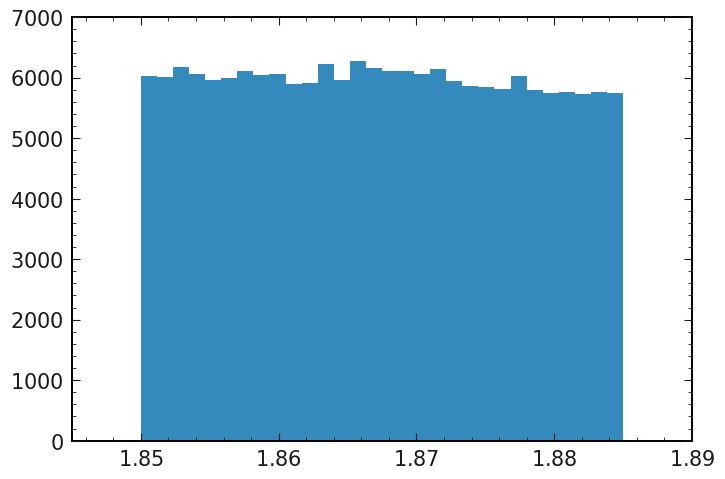

In [541]:
plt.hist(df_combined.Dp_M,bins=30)

In [542]:
unique_values = df_combined['Dp_isSignal'].unique()
print(unique_values)

[1. 0.]


In [543]:
df_combined 

,Pip_pionIDNN,Pip_pionID,Dp_Psum,Pip_genMotherID,etapip_Eta_genMotherID,Pip_genMotherPDG,etapip_Eta_genMotherPDG,Dp_cosHelicityAngleMomentum,Pip_dr,Dp_isSignal,Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane,Pip_p,Dp_CMS_p,etapip_Eta_p,CFT_prob,Dp_M,num_Dstar_no_nan,prob_signal
0,0.103861,1.034984e-02,4.888762,8.0,8.0,-411.0,-411.0,-0.375851,0.111640,1.0,0.999998,1.667133,4.109243,3.221629,0.165205,1.864783,-1.0,0.996331
1,0.001688,1.500499e-10,3.750505,3.0,3.0,411.0,411.0,-0.448339,0.029802,1.0,1.000000,1.184623,3.130171,2.565882,0.465892,1.883431,-1.0,0.966579
2,0.051907,4.620588e-06,4.597023,6.0,6.0,411.0,411.0,0.075892,0.034770,1.0,0.999994,2.405515,4.531484,2.191507,0.546568,1.870941,-1.0,0.988753
3,0.000112,4.916948e-18,3.644482,8.0,8.0,-411.0,-411.0,-0.060508,0.021049,1.0,0.999997,1.712064,3.702464,1.932417,0.070271,1.870542,-1.0,0.973754
4,0.107649,3.134626e-03,5.062702,7.0,7.0,-411.0,-411.0,0.720633,0.006974,1.0,0.999933,3.999937,4.553662,1.062765,0.991306,1.869134,-1.0,0.916495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3729984,0.178236,3.247679e-01,4.660300,2.0,2.0,23.0,23.0,0.676470,0.000730,0.0,-0.999992,3.591631,3.723276,1.068669,0.090485,1.878271,-1.0,0.055463
3729996,0.000004,6.149219e-17,3.802076,5.0,0.0,313.0,0.0,-0.645410,0.000524,0.0,0.994241,0.888286,2.716583,2.913790,0.453341,1.882959,-1.0,0.260632
3729997,0.000004,6.149219e-17,4.255802,5.0,2.0,313.0,23.0,-0.696950,0.000524,0.0,0.962217,0.888246,3.137665,3.367556,0.282388,1.878511,-1.0,0.236352
3730039,0.016114,1.259622e-16,2.900600,2.0,2.0,23.0,23.0,-0.202095,0.001235,0.0,0.997242,1.214550,2.587214,1.686050,0.058699,1.862771,-1.0,0.314894


In [544]:
# test = (df_combined['Pip_genMotherID'] == df_combined['etapip_Eta_genMotherID']) & abs(df_combined['Pip_genMotherPDG'])==431

In [545]:
# test.describe()

Best cut value: 0.9400000000000001
Best figure of merit: 9.10386237140695


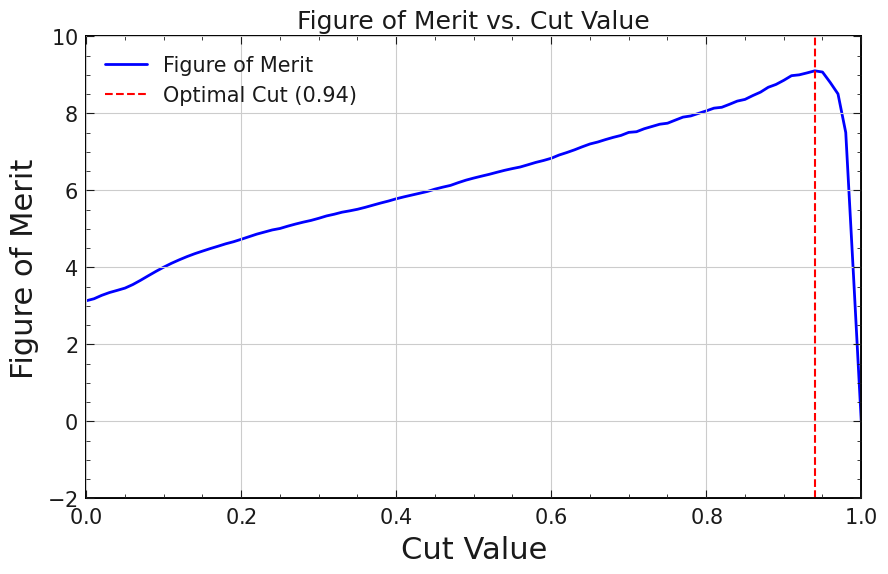

In [546]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

scale = 1/4
#Define the figure of merit function using query
def figure_of_merit(df, cut_value):
    df_cut = df.query('prob_signal > @cut_value')
    # Nsig = (df_cut['Dp_isSignal'] == 1).sum()
    # Nbkg = (df_cut['Dp_isSignal'] != 1).sum()
    Nsig = len(df_cut.query('Dp_isSignal==1'))
    Nbkg = len(df_cut.query('Dp_isSignal!=1'))
    if Nsig + Nbkg == 0:
        return 0
    return Nsig*scale / np.sqrt(Nsig*scale + Nbkg*scale)

# def figure_of_merit(df, cut_value):
#     df_cut = df.query('prob_signal > @cut_value')
#     Nsig = len(df_cut.query('(Pip_genMotherID == etapip_Eta_genMotherID) & abs(Pip_genMotherPDG)==431 '))
#     Nbkg = len(df_cut.query('(Pip_genMotherID != etapip_Eta_genMotherID) | abs(Pip_genMotherPDG)!=431 '))
#     # Nbkg = (df_cut['Dp_isSignal'] != 1).sum()
#     if Nsig + Nbkg == 0:
#         return 0
#     return Nsig*scale / np.sqrt(Nsig*scale + Nbkg*scale)




# def figure_of_merit(df, cut_value):
#     df_cut = df.query('prob_signal > @cut_value')
#     Nsig = (df_cut['Dp_isSignal'] == 1).sum()
#     Nbkg = (df_cut['Dp_isSignal'] != 1).sum()
#     if Nsig + Nbkg == 0:
#         return 0
#     return Nsig / np.sqrt(Nsig + Nbkg)
# Define range of cut values to test
cut_values = np.linspace(0, 1, 101)  # You can adjust the range and granularity

# Calculate figure of merit for each cut value
figures_of_merit = [figure_of_merit(df_combined, cut) for cut in cut_values]

# Find the best cut value
best_cut = cut_values[np.argmax(figures_of_merit)]
best_fom = max(figures_of_merit)

# Print the best cut value and corresponding figure of merit
print(f'Best cut value: {best_cut}')
print(f'Best figure of merit: {best_fom}')

# Plot figure of merit vs. cut value
plt.figure(figsize=(10, 6))
plt.plot(cut_values, figures_of_merit, color='blue', label='Figure of Merit', linewidth=2)
plt.axvline(x=best_cut, color='red', linestyle='--', label=f'Optimal Cut ({best_cut:.2f})')
plt.xlabel('Cut Value')
plt.ylabel('Figure of Merit')
plt.title('Figure of Merit vs. Cut Value')
plt.xlim(0,1)
plt.legend()
plt.grid(True)
# plt.savefig("MC15rd_etapip_pipipi_K_FOM_loose_v5_Pip_p_03_pidnn01.png")

plt.show()

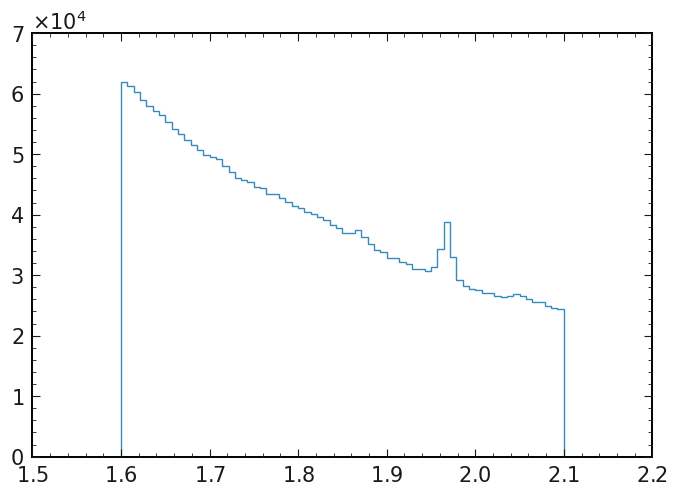

In [547]:
plt.hist(df_combined_all_range['Dp_M'],bins=np.linspace(1.6,2.1,71),histtype='step');

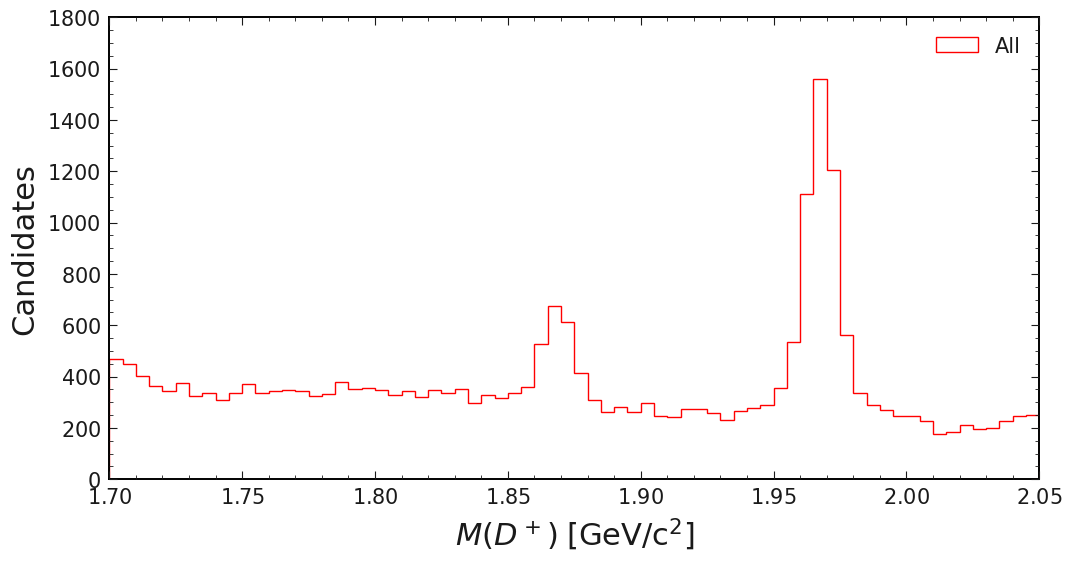

nsig=1086
nsig=271.5


In [548]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assume df_combined and best_cut are already defined
# For example purposes, I'll include a placeholder for df_combined
# df_combined = pd.read_csv('your_data.csv')  # Load your data here

# Define the optimal cut (replace with the actual value from your previous code)
optimal_cut = best_cut

# Separate the dataframe based on the optimal cut
df_signal = df_combined_all_range.query('prob_signal > @optimal_cut')
# Create histograms
plt.figure(figsize=(12, 6))

# Histogram for signal
plt.hist(df_signal['Dp_M'], bins=np.linspace(1.7, 2.05, 71), histtype='step', color='red', label='All')

# Histogram for background
# plt.hist(df_background['Dp_M'], bins=np.linspace(1.6, 2.1, 71), histtype='step', color='red', label='Background')

plt.xlabel('Dp_M')
plt.ylabel('Candidates')
# plt.title('Histogram of Dp_M for Signal and Background')
plt.legend()

# plt.grid(True)
plt.xlim(1.7,2.05)
plt.xlabel(r'$M(D^+) \; [\mathrm{GeV/c^2}]$')

# plt.savefig("MC15rd_etapip_pipipi_K_Dp_M_all_loose_v5_Pip_p_03_pidnn01.png")

plt.show()


scale = 1/4
df_signal_matched_true = df_signal.query('Dp_isSignal==1')
print(f'nsig={len(df_signal_matched_true)}')
print(f'nsig={len(df_signal_matched_true)*scale}')

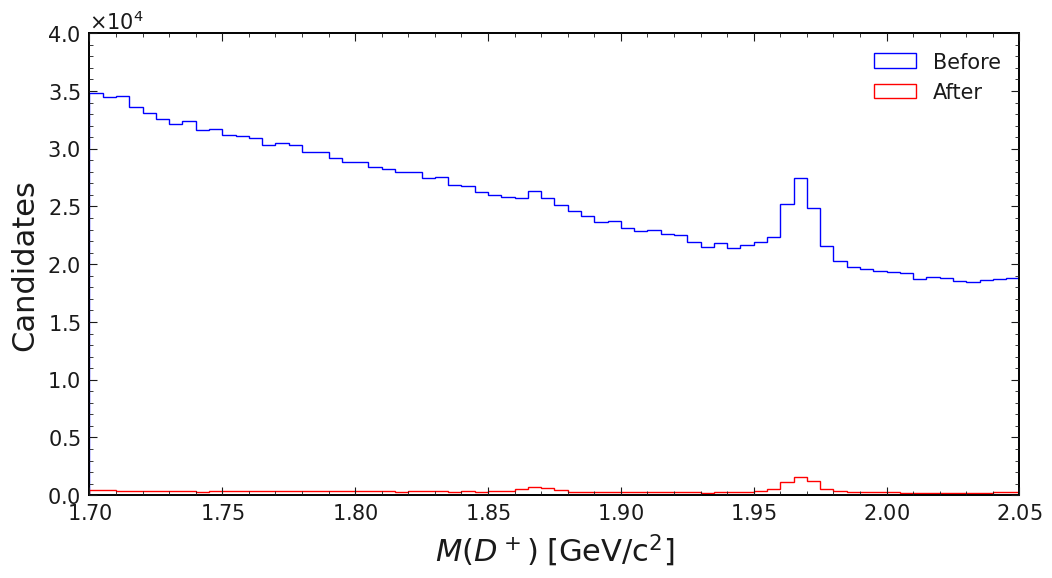

n_before=3730069
n_after=48521
cut eff=0.013008070360092534


In [549]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assume df_combined and best_cut are already defined
# For example purposes, I'll include a placeholder for df_combined
# df_combined = pd.read_csv('your_data.csv')  # Load your data here

# Define the optimal cut (replace with the actual value from your previous code)
optimal_cut = best_cut

# Separate the dataframe based on the optimal cut
df_signal = df_combined_all_range.query('prob_signal > 0')
df_background = df_combined_all_range.query('prob_signal > @optimal_cut')

# Create histograms
plt.figure(figsize=(12, 6))

# Histogram for signal
plt.hist(df_signal['Dp_M'], bins=np.linspace(1.7, 2.05, 71), histtype='step', color='blue', label='Before')

# Histogram for background
plt.hist(df_background['Dp_M'], bins=np.linspace(1.7, 2.05, 71), histtype='step', color='red', label='After')

plt.xlabel('Dp_M')
plt.ylabel('Candidates')
# plt.title('Histogram of Dp_M for Signal and Background')
plt.legend()

# plt.grid(True)

plt.xlabel(r'$M(D^+) \; [\mathrm{GeV/c^2}]$')
plt.xlim(1.7,2.05)
# plt.savefig("MC15rd_etapip_pipipi_K_Dp_M_before_loose_v5_Pip_p_03_pidnn01.png")

plt.show()



print(f'n_before={len(df_signal)}')
print(f'n_after={len(df_background)}')
print(f'cut eff={len(df_background)/len(df_signal)}')

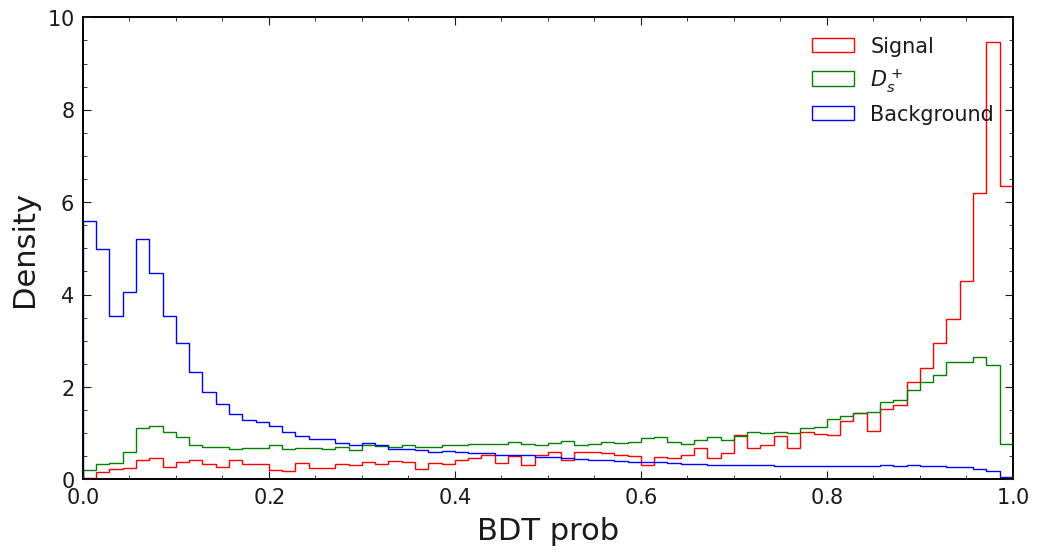

nsig=2789


In [550]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Separate the dataframe based on the optimal cut
df_signal = df_combined_all_range.query('Dp_isSignal==1')
df_background = df_combined_all_range.query('Dp_isSignal!=1 & (Pip_genMotherID!=etapip_Eta_genMotherID) | abs(Pip_genMotherPDG)!=431 | abs(etapip_Eta_genMotherPDG)!=431')
df_background_Ds = df_combined_all_range.query('Dp_isSignal!=1 & (Pip_genMotherID==etapip_Eta_genMotherID) & abs(Pip_genMotherPDG)==431 & abs(etapip_Eta_genMotherPDG)==431')

# Create histograms
plt.figure(figsize=(12, 6))

# Histogram for signal
plt.hist(df_signal['prob_signal'], bins=np.linspace(0,1, 71), histtype='step', color='red', label='Signal',density=True)
plt.hist(df_background_Ds['prob_signal'], bins=np.linspace(0,1, 71), histtype='step', color='green', label='$D_s^+$',density=True)

# Histogram for background
plt.hist(df_background['prob_signal'], bins=np.linspace(0,1, 71), histtype='step', color='blue', label='Background',density=True)

plt.xlabel('BDT prob')
plt.ylabel('Density')
# plt.title('Histogram of Dp_M for Signal and Background')
plt.legend()

# plt.grid(True)
plt.xlim(0,1)
# plt.savefig("MC15rd_etapip_pipipi_K_BDT_output_Dp_Ds_bkg_loose_v5_Pip_p_03_pidnn01.png")

plt.show()


print(f'nsig={len(df_signal)}')